In [1]:
#Table Of Contents

#1-Get the data

#2-Discover and visualize the data to gain insights

#3-Prepare the data for Machine Learning Algorithms

#4- Select a model and train it

#5 Alternative Model

#6-Fine tune your model

#7-Bibliography

In [2]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}..Available at: {url} [Accesed] {access_date}]'
    return citation

In [3]:
# Example usage
author = "Andy McDonald"
year = "2022"
title ='Isolation Forest — Auto Anomaly Detection with Python'
url = "https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562"
access_date = "22-11-2023"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

Andy McDonald,2022.Isolation Forest — Auto Anomaly Detection with Python..Available at: https://towardsdatascience.com/isolation-forest-auto-anomaly-detection-with-python-e7a8559d4562 [Accesed] 22-11-2023]


In [4]:
from IPython.display import HTML

HTML('''<script>

code_show=true;

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

}

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from tqdm import tqdm
import missingno as msno
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import math
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


from google.colab import files
uploaded = files.upload()


#  Get the data

In [6]:
df0=pd.read_csv('creditcard.csv')# Read in out Dataset

# Discover and visualize the data to gain insights

In [7]:
df0.head(-5)# Take at our first & last 5 rows using the head function

Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
284797  172782.0 -0.241923  0.712247  0.399806 -0.463406  0.244531 -1.343668   
284798  172782.0  0.219529  0.881246 -0.635891  0.960928 -0.152971 -1.014307   
284799  172783.0 -1.775135 -0.004235  1.189786  0.331096  1.196063  5.519980   
284800  172784.0  2.039560 -0.175233 -1.196825  0.234580 -0.008713 -0.726571   
284801  172785.0  0.120316  0.931005 -0.546012 -0.745097  1.130314 -0.235973   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1      -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2       0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3       0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4       0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...          ...       ...       ...  ...       ...       ...       ...   
284797  0.929369 -0.206210  0.106234  ... -0.228876 -0.514376  0.279598   
284798  0.427126  0.121340 -0.285670  ...  0.099936  0.337120  0.251791   
284799 -1.518185  2.080825  1.159498  ...  0.103302  0.654850 -0.348929   
284800  0.017050 -0.118228  0.435402  ... -0.268048 -0.717211  0.297930   
284801  0.812722  0.115093 -0.204064  ... -0.314205 -0.808520  0.050343   

             V24       V25       V26       V27       V28  Amount  Class  
0       0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1      -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2      -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3      -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4       0.141267 -0.206010  0.502292  0.219422  0.215153   69.99      0  
...          ...       ...       ...       ...       ...     ...    ...  
284797  0.371441 -0.559238  0.113144  0.131507  0.081265    5.49      0  
284798  0.057688 -1.508368  0.144023  0.181205  0.215243   24.05      0  
284799  0.745323  0.704545 -0.127579  0.454379  0.130308   79.99      0  
284800 -0.359769 -0.315610  0.201114 -0.080826 -0.075071    2.68      0  
284801  0.102800 -0.435870  0.124079  0.217940  0.068803    2.69      0  

[284802 rows x 31 columns]

In [8]:
missing_values=df0.isnull().sum()# Discover missing values in our dataset
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
timedelta = pd.to_timedelta(df0['Time'], unit='s')# We have added categorical data to our dataset
df0['Time_hour'] = (timedelta.dt.components.hours).astype(int)
df0['Day_Night'] = 'Empty'
df0.loc[(df0['Time_hour'] >= 0) & (df0['Time_hour'] <= 6), 'Day_Night'] = 'Early Morning'
df0.loc[(df0['Time_hour'] > 6) & (df0['Time_hour'] <= 12), 'Day_Night'] = 'Morning'
df0.loc[(df0['Time_hour'] > 12) & (df0['Time_hour'] <= 18), 'Day_Night'] = 'Afternoon'
df0.loc[(df0['Time_hour'] > 18) & (df0['Time_hour'] <= 24), 'Day_Night'] = 'Evening'

# Xiao,2022.A Practical Guide To Exploratory Data Analysis..Available at: https://medium.com/mlearning-ai/a-practical-guide-to-exploratory-data-analysis-fabbac2bcad [Accesed] 03-11-2023]

In [10]:
df0['Day_Night'].value_counts()# We have created instances of when credit card fraud has taken place

Day_Night
Afternoon        98054
Morning          82231
Evening          76487
Early Morning    28035
Name: count, dtype: int64

In [11]:
df0[['Day_Night', 'Class']].value_counts()# We have created a count for or categories in day night column

Day_Night      Class
Afternoon      0        97904
Morning        0        82105
Evening        0        76404
Early Morning  0        27902
Afternoon      1          150
Early Morning  1          133
Morning        1          126
Evening        1           83
Name: count, dtype: int64

In [12]:
df=df0

In [13]:
df.shape# Have a look at the shape of our dataset which produces a tuple

(284807, 33)

In [14]:
df['Class'].value_counts()# we have identified the fraud & non frud in our dataset

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [16]:
df.info()# We use the info function see to understand the structure of our dataframe ie missing values & data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       284807 non-null  float64
 1   V1         284807 non-null  float64
 2   V2         284807 non-null  float64
 3   V3         284807 non-null  float64
 4   V4         284807 non-null  float64
 5   V5         284807 non-null  float64
 6   V6         284807 non-null  float64
 7   V7         284807 non-null  float64
 8   V8         284807 non-null  float64
 9   V9         284807 non-null  float64
 10  V10        284807 non-null  float64
 11  V11        284807 non-null  float64
 12  V12        284807 non-null  float64
 13  V13        284807 non-null  float64
 14  V14        284807 non-null  float64
 15  V15        284807 non-null  float64
 16  V16        284807 non-null  float64
 17  V17        284807 non-null  float64
 18  V18        284807 non-null  float64
 19  V19        284807 non-n

Observation we can observe from our info column we have no missing data and we have a mixture of floats, ints and object

In [17]:
df.describe().round(2).transpose()# Summary of each numerical attribute

count      mean       std     min       25%       50%  \
Time       284807.0  94813.86  47488.15    0.00  54201.50  84692.00   
V1         284807.0      0.00      1.96  -56.41     -0.92      0.02   
V2         284807.0      0.00      1.65  -72.72     -0.60      0.07   
V3         284807.0     -0.00      1.52  -48.33     -0.89      0.18   
V4         284807.0      0.00      1.42   -5.68     -0.85     -0.02   
V5         284807.0      0.00      1.38 -113.74     -0.69     -0.05   
V6         284807.0      0.00      1.33  -26.16     -0.77     -0.27   
V7         284807.0     -0.00      1.24  -43.56     -0.55      0.04   
V8         284807.0      0.00      1.19  -73.22     -0.21      0.02   
V9         284807.0     -0.00      1.10  -13.43     -0.64     -0.05   
V10        284807.0      0.00      1.09  -24.59     -0.54     -0.09   
V11        284807.0      0.00      1.02   -4.80     -0.76     -0.03   
V12        284807.0     -0.00      1.00  -18.68     -0.41      0.14   
V13        284807.0      0.00      1.00   -5.79     -0.65     -0.01   
V14        284807.0      0.00      0.96  -19.21     -0.43      0.05   
V15        284807.0      0.00      0.92   -4.50     -0.58      0.05   
V16        284807.0      0.00      0.88  -14.13     -0.47      0.07   
V17        284807.0     -0.00      0.85  -25.16     -0.48     -0.07   
V18        284807.0      0.00      0.84   -9.50     -0.50     -0.00   
V19        284807.0      0.00      0.81   -7.21     -0.46      0.00   
V20        284807.0      0.00      0.77  -54.50     -0.21     -0.06   
V21        284807.0      0.00      0.73  -34.83     -0.23     -0.03   
V22        284807.0     -0.00      0.73  -10.93     -0.54      0.01   
V23        284807.0      0.00      0.62  -44.81     -0.16     -0.01   
V24        284807.0      0.00      0.61   -2.84     -0.35      0.04   
V25        284807.0      0.00      0.52  -10.30     -0.32      0.02   
V26        284807.0      0.00      0.48   -2.60     -0.33     -0.05   
V27        284807.0     -0.00      0.40  -22.57     -0.07      0.00   
V28        284807.0     -0.00      0.33  -15.43     -0.05      0.01   
Amount     284807.0     88.35    250.12    0.00      5.60     22.00   
Class      284807.0      0.00      0.04    0.00      0.00      0.00   
Time_hour  284807.0     14.05      5.84    0.00     10.00     15.00   

                 75%        max  
Time       139320.50  172792.00  
V1              1.32       2.45  
V2              0.80      22.06  
V3              1.03       9.38  
V4              0.74      16.88  
V5              0.61      34.80  
V6              0.40      73.30  
V7              0.57     120.59  
V8              0.33      20.01  
V9              0.60      15.59  
V10             0.45      23.75  
V11             0.74      12.02  
V12             0.62       7.85  
V13             0.66       7.13  
V14             0.49      10.53  
V15             0.65       8.88  
V16             0.52      17.32  
V17             0.40       9.25  
V18             0.50       5.04  
V19             0.46       5.59  
V20             0.13      39.42  
V21             0.19      27.20  
V22             0.53      10.50  
V23             0.15      22.53  
V24             0.44       4.58  
V25             0.35       7.52  
V26             0.24       3.52  
V27             0.09      31.61  
V28             0.08      33.85  
Amount         77.16   25691.16  
Class           0.00       1.00  
Time_hour      19.00      23.00

Observation_ We can observe our features, we can observe from our data that there will be a need to scale our data

In [18]:
df.describe(include = ['O'])# we have used describe function on oyr day_night column

Day_Night
count      284807
unique          4
top     Afternoon
freq        98054

In [19]:
df.head(1)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   

        V28  Amount  Class  Time_hour      Day_Night  
0 -0.021053  149.62      0          0  Early Morning  

[1 rows x 33 columns]

In [20]:
print("Total number of Credit Card datapoints: ",df.shape[0])# We have created a list of our features
print("Total number of features: ",df.shape[1])

print("The column/feature names given are:\n ",list(df.columns))

Total number of Credit Card datapoints:  284807
Total number of features:  33
The column/feature names given are:
  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'Time_hour', 'Day_Night']


In [21]:
plt.style.use('fivethirtyeight')# we have created a corelation plot
plt.figure(figsize = (20,10), dpi = 650)
sns.heatmap(df.drop(['Class', 'Day_Night', 'Time'], axis = 1).corr(), cmap="YlGnBu")
plt.title('Correlation Plot ' ,fontsize=20,fontweight='bold',color='darkgrey',loc='left')

Text(0.0, 1.0, 'Correlation Plot ')

Observation- From our correlation plot we can not observe correlation also there is no sign of multicolernity

In [22]:
# we will complete histplot, boxplots for our features
cols = df.drop(['Class', 'Time_hour', 'Day_Night'], axis = 1).columns
#grid = gridspec.GridSpec(16, 2)
fig = plt.figure(figsize = (20,200), dpi = 300)
for n, col in enumerate(cols): 
    if n%2 == 0:
        ax = fig.add_subplot(30, 2, 2*n+1)
        sns.histplot(df[col], bins = 100)
        plt.grid(axis = 'x')
        ax.set_title("Distribution of %s " %col)
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        ax = fig.add_subplot(30, 2, 2*n+3)
        sns.boxplot(data = df[col],orient = 'h')
        ax.set_title("Boxplot of %s" %col)
        ax.set_xlabel('')
        ax.set_ylabel('')
        
    if n%2 == 1:
        ax = fig.add_subplot(30, 2, 2*n)
        sns.histplot(df[col], bins = 100)
        plt.grid(axis = 'x')
        ax.set_title("Distribution of %s" %col)
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        ax = fig.add_subplot(30, 2, 2*n+2)
        sns.boxplot(data = df[col],orient = 'h')
        ax.set_title("Boxplot of %s" %col)
        ax.set_xlabel('')
        ax.set_ylabel('')
plt.show()
# Xiao,2022.A Practical Guide To Exploratory Data Analysis..Available at: https://medium.com/mlearning-ai/a-practical-guide-to-exploratory-data-analysis-fabbac2bcad [Accesed] 03-11-2023]

Observation- We can observe from from our histograms & boxplots that some of our features are skewed, have kurtosis and outliers which will have a bearing on the type of machine learning model we use

# Prepare the data for machine learning algorithms

In [23]:
df.head(1)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   

        V28  Amount  Class  Time_hour      Day_Night  
0 -0.021053  149.62      0          0  Early Morning  

[1 rows x 33 columns]

In [24]:
df['Class'].value_counts(normalize=True)# we have created a % of our class label

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

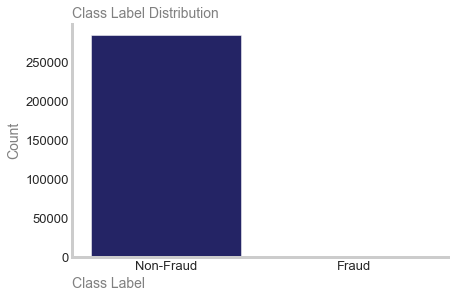

The number of positive class points is:  492
The number of negative class points is:  284315


In [25]:
# We have created a histogram to discover the distribution within our class feature
sns.set_style('whitegrid')
figsize=(8,4) # we have created a histogram of our class labels
sns.barplot(df['Class'].unique(),df['Class'].value_counts(),color='midnightblue')
plt.xticks(ticks=df['Class'].unique(), labels=['Non-Fraud', 'Fraud'],fontsize=13,)
plt.yticks(fontsize=13)
plt.title('Class Label Distribution',fontsize=14,color='grey',loc='left')
plt.xlabel('Class Label',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

print('The number of positive class points is: ',df['Class'].value_counts()[1])
print('The number of negative class points is: ',df['Class'].value_counts()[0])

Observation- We can observe that our class feature is highly imbalanced, this will be need to be balanced to avoid our model becoming overfitted.

In [26]:
X=df.drop(columns=['Class','Day_Night','Time_hour'])# As they are categorical we are going to drop these columns
y=df['Class']

# Select a model and train it

I was orginally going to run A SVC model however due to the fact the hyperplane is trained on every instance I decided to use an SGD classifer to reduce the run time off our models

In [27]:

#svc_model = SVC()
#svc_model.fit(X_train, y_train)

Accuracy : 1.00
Classification Report on 70% split :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Precision on 70% split without smote & scaling applied:  0.00
Recall on 70% split without smote & scaling applied: 0.00
 F1 Score on 70% split without smote & scailing applied: 0.00


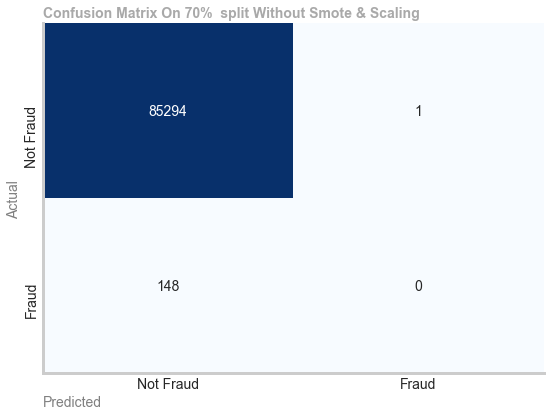

In [28]:
# We will run a model without smote to balance our data and without scaling our data
X_train30,X_test30,y_train30,y_test30= train_test_split(X,y, test_size=0.30, stratify= y , random_state=2011)

#scaler= MinMaxScaler()

#smote=SMOTE(random_state=42)

#X_train30_balanced,y_train30_balanced= smote.fit_resample(scaler.fit_transform(X_train30), y_train30)

#X_test_scaled= scaler.transform(X_test30)

sgd_clf= SGDClassifier(random_state=42, penalty='l2',alpha=0.01)

sgd_clf.fit(X_train30,y_train30)

y_pred= sgd_clf.predict(X_test30)

accuracy=accuracy_score(y_test30,y_pred)
print(f'Accuracy : {accuracy:.2f}')

print ('Classification Report on 70% split :')
print(classification_report(y_test30, y_pred))

precision= precision_score(y_test30,y_pred)
recall=recall_score(y_test30,y_pred)

print(f'Precision on 70% split without smote & scaling applied: {precision: .2f}')
print(f'Recall on 70% split without smote & scaling applied: {recall:.2f}')

f1_value=f1_score(y_test30,y_pred)
print(f' F1 Score on 70% split without smote & scailing applied: {f1_value:.2f}')


cm = confusion_matrix(y_test30, y_pred)

# Create a heatmap of the confusion matrix using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix On 70%  split Without Smote & Scaling',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

Observation- This is why we need to understand why accurracy in the context of our analysis is not an important metric. To an untrained eye this is a great result we have achieved a 100% accurracy by identifying all the non frauds. However without using SMOTE to balance our class feature will overtrain on our data but not generalize well on unseen data. We have failed to identify any frauds by not processing our data correctly prior to implementation of our machine models.

In [29]:
# we have split our data, due to imblanced data we have used to balance our dataset & and finally run an SGD Classifier
X_train30,X_test30,y_train30,y_test30= train_test_split(X,y, test_size=0.30, stratify= y , random_state=2011)

In [30]:
X_train30.shape, y_train30.shape, X_test30.shape, y_test30.shape

((199364, 30), (199364,), (85443, 30), (85443,))

Accuracy on 70% split : 1.00
Classification Report on 70 % split :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.78      0.76       148

    accuracy                           1.00     85443
   macro avg       0.87      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Precision on our model 70% split:  0.74
Recall on our model 70% split: 0.78
 F1 Score 70% split: 0.76


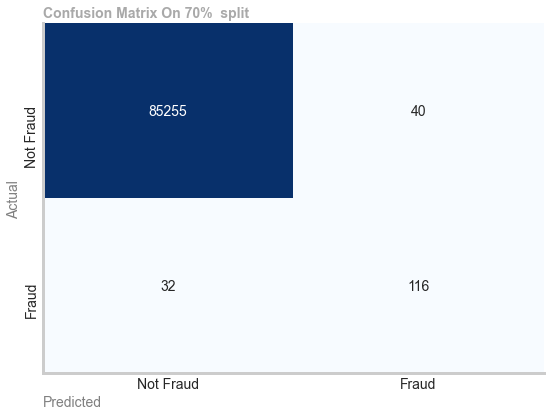

In [31]:
scaler= MinMaxScaler()


smote=SMOTE(random_state=42)

X_train30_balanced,y_train30_balanced= smote.fit_resample(scaler.fit_transform(X_train30), y_train30)

X_test_scaled= scaler.transform(X_test30)

sgd_clf= SGDClassifier(random_state=42, penalty='l2',alpha=0.01)

sgd_clf.fit(X_train30_balanced,y_train30_balanced)

y_pred= sgd_clf.predict(X_test_scaled)

accuracy=accuracy_score(y_test30,y_pred)
print(f'Accuracy on 70% split : {accuracy:.2f}')

print ('Classification Report on 70 % split :')
print(classification_report(y_test30, y_pred))

precision= precision_score(y_test30,y_pred)
recall=recall_score(y_test30,y_pred)

print(f'Precision on our model 70% split: {precision: .2f}')
print(f'Recall on our model 70% split: {recall:.2f}')

f1_value=f1_score(y_test30,y_pred)
print(f' F1 Score 70% split: {f1_value:.2f}')


cm = confusion_matrix(y_test30, y_pred)

# Create a heatmap of the confusion matrix using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix On 70%  split',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()



Observation- We can see from our 70% splite that we achived a very high accurracy but as this a credit card fraud analysis we are not interested in accurracy. Our chosen metric is the F1 score which is based on the precision & recall figures. When we look at our F1 score it is not so good. we have only achieved 76% figure which woud suggest for every four frauds our model we are only is predicting three of them.

ROC & Precision-Recall curves are common tools to evaluate the performance of classification algorithms. As our classes are imbalanced the Precision_recall curve is off use to us.

shape of y_test30: (85443,)
shape of y_scores: (85443,)


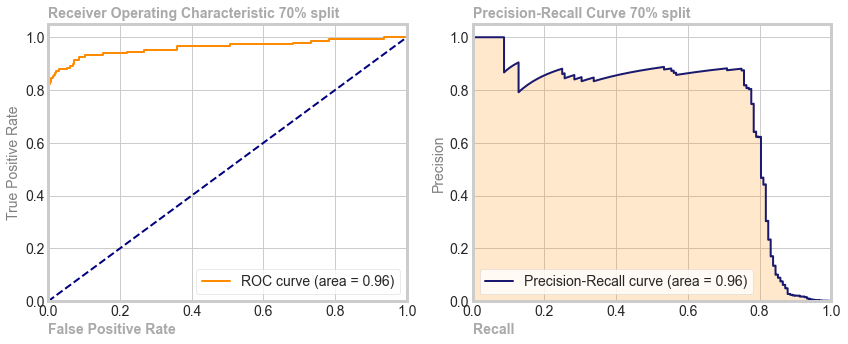

In [32]:

# Get predicted probabilities and compute ROC and Precision-Recall
y_scores = sgd_clf.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test30, y_scores)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test30, y_scores)
pr_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(12, 5))

print('shape of y_test30:', y_test30.shape)
print('shape of y_scores:', y_scores.shape)

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('True Positive Rate',fontsize=14,color= 'grey')
plt.title('Receiver Operating Characteristic 70% split ' ,fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='midnightblue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='darkorange')
plt.xlabel('Recall',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Precision',fontsize=14,color= 'grey')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve 70% split ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

#meghan Natarajan,2023.Intuition behind AUC and Precision-Recall Curves..Available at: https://medium.com/@megha.natarajan/intuition-behind-auc-and-precision-recall-curves-7a33d2d45e02 [Accesed] 21-11-2023]

Observation- We can see from our curves are models are performing well.

Roc curve .96 is quite high & indiates that the model can distinguish between postive and negative classes. the blue dashed line is a random selection so the further away the orange is indicates the model is performing well

Precision_Recall curve is also high at .96 this suggests that our model has high precision and recall which is important where we have a postive class(fraud) which is rare.

In [33]:
# we have split our data using an 80/20 split
X_train20,X_test20,y_train20,y_test20= train_test_split(X,y, test_size=0.20, stratify= y , random_state=2011)# we have split our data, due to imblanced data we have used to balance our dataset & and finally run an SGD Classifier

In [34]:
# Get the shape of our train\test split
X_train20.shape, y_train20.shape, X_test20.shape, y_test20.shape

((227845, 30), (227845,), (56962, 30), (56962,))

Accuracy on 80% split : 1.00
Classification Report 80% split :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.78      0.75        98

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Precision on Our Model 80% split : 0.73
Recall on Our Model 80% split:0.78
 F1 Score on 80% split: 0.75


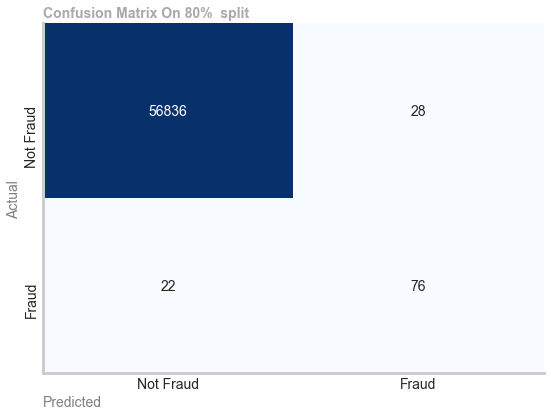

In [35]:


scaler= MinMaxScaler()

smote=SMOTE(random_state=42)

X_train20_balanced,y_train20_balanced= smote.fit_resample(scaler.fit_transform(X_train20), y_train20)

X_test_scaled= scaler.transform(X_test20)

sgd_clf= SGDClassifier(random_state=42, penalty='l2',alpha=0.01)

sgd_clf.fit(X_train20_balanced,y_train20_balanced)

y_pred= sgd_clf.predict(X_test_scaled)

accuracy=accuracy_score(y_test20,y_pred)
print(f'Accuracy on 80% split : {accuracy:.2f}')

print ('Classification Report 80% split :')
print(classification_report(y_test20, y_pred))

precision= precision_score(y_test20,y_pred)
recall=recall_score(y_test20,y_pred)

print(f'Precision on Our Model 80% split :{precision: .2f}')
print(f'Recall on Our Model 80% split:{recall:.2f}')

f1_value=f1_score(y_test20,y_pred)
print(f' F1 Score on 80% split: {f1_value:.2f}')

cm = confusion_matrix(y_test20, y_pred)

# Create a heatmap of the confusion matrix using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix On 80%  split',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

Observation- One of the tools we also have we have is in a classification model is a confusion matrix. When we observe model  
 we see a 2 by  2 matrix made up of  True Postive(TP) True Negative(TN) False negative (FN) &  False Postive(FP). When we look at our confusion matrix that on the 80% split our model predicted correctly that 56836 cases were not fraud which were not fraud(true Postive), 28 cases that were not fraud which turned out to be fraud(true negative), 22 cases of fraud which turned out to be non fraud(false negative), & 76 cases of fraud that were proved to be fraud (false postive).

shape of y_test30: (56962,)
shape of y_scores: (56962,)


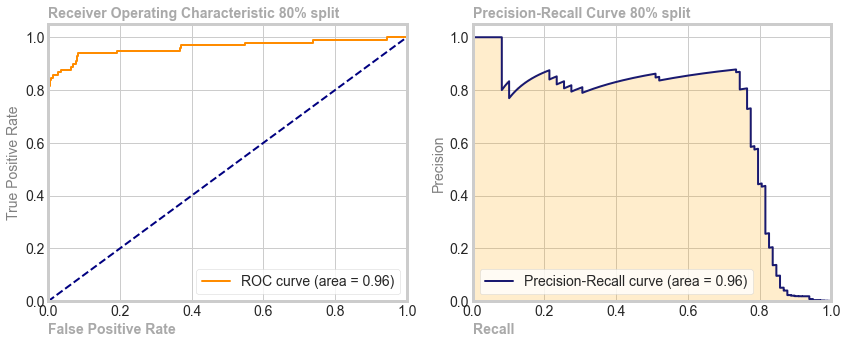

In [36]:
y_scores = sgd_clf.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test20, y_scores)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test20, y_scores)
pr_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(12, 5))

print('shape of y_test30:', y_test20.shape)
print('shape of y_scores:', y_scores.shape)

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('True Positive Rate',fontsize=14,color= 'grey')
plt.title('Receiver Operating Characteristic 80% split ' ,fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='midnightblue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='orange')
plt.xlabel('Recall',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Precision',fontsize=14,color= 'grey')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve 80% split ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

#meghan Natarajan,2023.Intuition behind AUC and Precision-Recall Curves..Available at: https://medium.com/@megha.natarajan/intuition-behind-auc-and-precision-recall-curves-7a33d2d45e02 [Accesed] 21-11-2023]

In [37]:
# we have run a dummy classifier as a baseline to compare our models
dummy_classifier=DummyClassifier(strategy='stratified')
dummy_classifier.fit(X_train20_balanced,y_train20_balanced)

y_pred=dummy_classifier.predict(X_test20)

accuracy=accuracy_score(y_test20,y_pred)
print(f'Accuracy Dummy Classifier: {accuracy:.2f}')

print ('Classification Report Dummy classifier:')
print(classification_report(y_test20, y_pred))

precision_micro = precision_score(y_test20, y_pred, average='micro')
recall_micro = recall_score(y_test20, y_pred, average='micro')




Accuracy Dummy Classifier: 0.50
Classification Report Dummy classifier:
              precision    recall  f1-score   support

           0       1.00      0.50      0.66     56864
           1       0.00      0.51      0.00        98

    accuracy                           0.50     56962
   macro avg       0.50      0.50      0.33     56962
weighted avg       1.00      0.50      0.66     56962



We have run a couple of models with different splits but how do we know if these results are good. this is where we can use a dummy classifier. It runs on simple rules anf gives us a baseline to measure our more complicated models. If our models can not beat the dummy classifier then we would need to stop and look at our data again.

Our preferred metric of F1 in the dummy classifier is 0.67 where as our lowest F1 score is .76 we are good to precede with our analysis

In [38]:
# we have split our data, due to imblanced data we have used to balance our dataset & and finally run an SGD Classifier
X_train10,X_test10,y_train10,y_test10= train_test_split(X,y, test_size=0.30, stratify= y , random_state=2011)


In [39]:
# Get the shape of our train\test split
X_train10.shape, y_train10.shape, X_test10.shape, y_test10.shape

((199364, 30), (199364,), (85443, 30), (85443,))

Accuracy 90% split : 1.00
Classification Report on 90% split :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.78      0.76       148

    accuracy                           1.00     85443
   macro avg       0.87      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Precision on 90% split:  0.74
Recall 90% split: 0.78
 F1 Score 90% split: 0.76


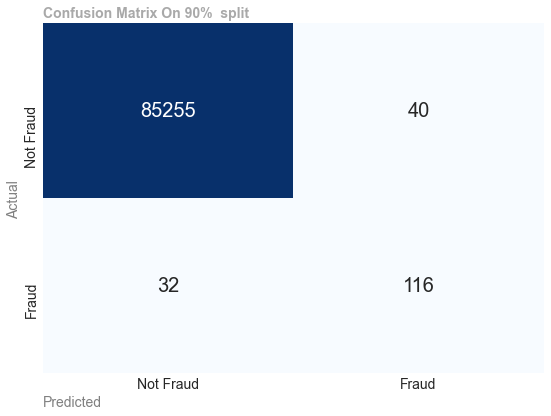

In [40]:


scaler= MinMaxScaler()

smote=SMOTE(random_state=42)

X_train10_balanced,y_train10_balanced= smote.fit_resample(scaler.fit_transform(X_train10), y_train10)

X_test_scaled= scaler.transform(X_test10)

sgd_clf=SGDClassifier(random_state=42, penalty="l2", alpha=0.01)

sgd_clf.fit(X_train10_balanced,y_train30_balanced)

y_pred= sgd_clf.predict(X_test_scaled)

accuracy=accuracy_score(y_test10,y_pred)
print(f'Accuracy 90% split : {accuracy:.2f}')

print ('Classification Report on 90% split :')
print(classification_report(y_test10, y_pred))

precision= precision_score(y_test10,y_pred)
recall=recall_score(y_test10,y_pred)

print(f'Precision on 90% split: {precision: .2f}')
print(f'Recall 90% split: {recall:.2f}')

f1_value=f1_score(y_test10,y_pred)
print(f' F1 Score 90% split: {f1_value:.2f}')


cm = confusion_matrix(y_test10, y_pred)

# Create a heatmap of the confusion matrix using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'],annot_kws={'size':20})

plt.title('Confusion Matrix On 90%  split',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')

plt.grid(False)
plt.show()

shape of y_test30: (85443,)
shape of y_scores: (85443,)


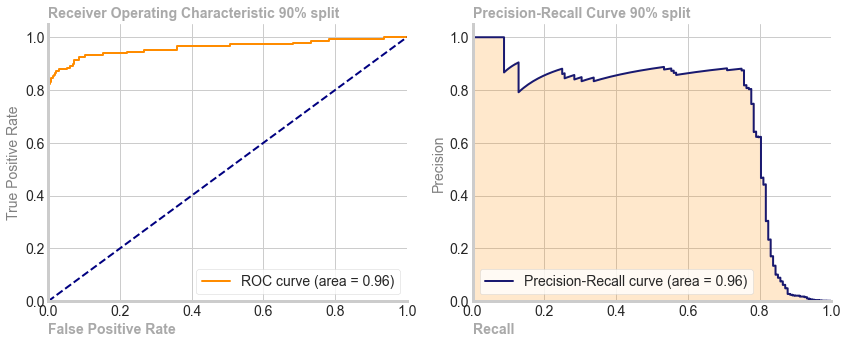

In [41]:
y_scores = sgd_clf.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test10, y_scores)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test10, y_scores)
pr_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(12, 5))

print('shape of y_test30:', y_test30.shape)
print('shape of y_scores:', y_scores.shape)

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('True Positive Rate',fontsize=14,color= 'grey')
plt.title('Receiver Operating Characteristic 90% split ' ,fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='midnightblue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='darkorange')
plt.xlabel('Recall',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Precision',fontsize=14,color= 'grey')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve 90% split ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend(loc="lower left")
sns.despine()
plt.tight_layout()
plt.show()

#meghan Natarajan,2023.Intuition behind AUC and Precision-Recall Curves..Available at: https://medium.com/@megha.natarajan/intuition-behind-auc-and-precision-recall-curves-7a33d2d45e02 [Accesed] 21-11-2023]

We have run our models with three different models aou best split is 90% train 10% split, this is probaly due to the size of our data and may not be suitable for other analysis.

One of the downsides of just splitting data is how do we know our split was correct and represented our data fairly. We can use 
cross validation to take many splits of our data and compare them against each other to get an average

 Cross_Validation mean Accuracy: 0.9117
 Cross_Validation mean Precision: 0.9995
 Cross_Validation mean Recall: 0.8238


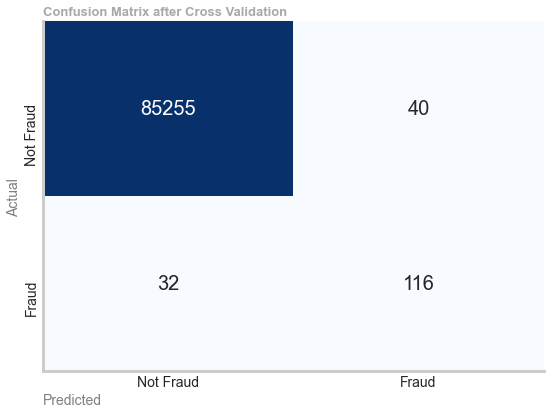

In [42]:
# we have run a cross valuation to evaluate our preferred model with 5 splits

skfolds= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


clone_clf=clone(sgd_clf)


cv_scores_accuracy= cross_val_score(clone_clf,X_train10_balanced,y_train10_balanced, cv=skfolds, scoring='accuracy')
cv_scores_precision= cross_val_score(clone_clf,X_train10_balanced,y_train10_balanced, cv=skfolds, scoring='precision')
cv_scores_recall= cross_val_score(clone_clf,X_train10_balanced,y_train10_balanced, cv=skfolds, scoring='recall')
  

print(f' Cross_Validation mean Accuracy: {cv_scores_accuracy.mean():.4f}')
print(f' Cross_Validation mean Precision: {cv_scores_precision.mean():.4f}')
print(f' Cross_Validation mean Recall: {cv_scores_recall.mean():.4f}')

y_train_pred_cv= cross_val_predict(clone_clf, X_train10_balanced, y_train10_balanced, cv = skfolds)

cm_cv=confusion_matrix(y_train10_balanced,y_train_pred_cv)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'],annot_kws={'size':20})

plt.title('Confusion Matrix after Cross Validation',fontsize=13,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()



#Geron, A. (2019) Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. 2nd ed. Sebastopol, CA: O’Reilly Media.

We can see after after cross validation we have not improved our outcomes however we can be more certain that data will generalize to new unseen data

In [43]:
# we will carry out hypeermater tuning to improve our model
params= {
    'loss' : ['hinge','log', 'modified_huber'],
    'alpha' : [0.001,0.01],
    'penalty' : ['l2','l1']
}

clf= SGDClassifier(max_iter=1000)
random_search=RandomizedSearchCV(clf,param_distributions=params, n_iter=10, cv =5)
random_search.fit(X_train10_balanced,y_train10_balanced)
print(random_search.best_params_)

{'penalty': 'l1', 'loss': 'modified_huber', 'alpha': 0.001}


It would have been optimal to use grid search for our hyperparameter tuning due to the size of our dataset we used randomizedsearchcv which is not as computiaonally expensive. We also need ed to reduce our parameters to insure our model would run in good time. I expect as a result of this this will not improve outr model 

Accuracy  after hyperparameter training: 0.95
Classification Report after hyperparameter training :
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.88      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Precision after hyperparameter training:  0.03
Recall after hyperparameter training: 0.88
 F1 Score after hyperparameter training: 0.06


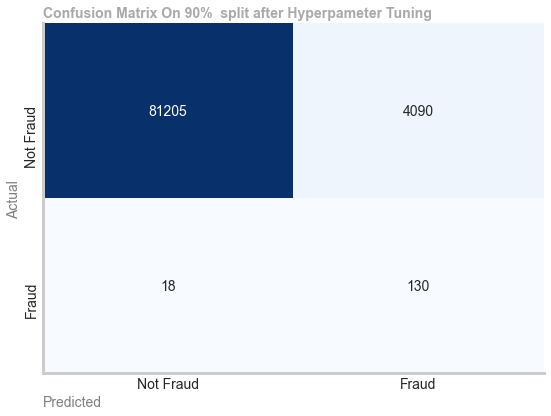

In [44]:
# apply our best parameters to our model
best_params= {'penalty': 'l1', 'loss': 'modified_huber', 'alpha': 0.001}

best_clf= SGDClassifier(max_iter=1000, **best_params)

best_clf.fit(X_train10_balanced, y_train10_balanced)

y_pred= best_clf.predict(X_test_scaled)

accuracy=accuracy_score(y_test10,y_pred)
print(f'Accuracy  after hyperparameter training: {accuracy:.2f}')

print ('Classification Report after hyperparameter training :')
print(classification_report(y_test10, y_pred))

precision= precision_score(y_test10,y_pred)
recall=recall_score(y_test10,y_pred)

print(f'Precision after hyperparameter training: {precision: .2f}')
print(f'Recall after hyperparameter training: {recall:.2f}')

f1_value=f1_score(y_test10,y_pred)
print(f' F1 Score after hyperparameter training: {f1_value:.2f}')
cm = confusion_matrix(y_test10, y_pred)

# Create a heatmap of the confusion matrix using Seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix On 90%  split after Hyperpameter Tuning',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

In [45]:
f1_value=f1_score(y_test10,y_pred)
print(f' F1 Score: {f1_value:.2f}')

 F1 Score: 0.06


This is interesting and why it is important to check all metrics after tuning the model the F1 score has been reduced and while we see an increase in the false postives we have also seen an increasse in true negatives.Our F1 result of 0.06 is the effect of using too few parameters due to the size of our dataset.

# Alternative Model Anomaly Detection

We have run a classification model but what if we can improve it using a different strategy. we are trying to dectect anomalies 
within our data (frauds non frauds) we know classification models are trying to find the pattern for the majority of the instances. So we are going to look at a unsupervised model Isolation forest to comapre our results. Isolation forests are ideally suited for large datasets

In [46]:
df.head(2) # we are to try an unsupervised model

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   

        V28  Amount  Class  Time_hour      Day_Night  
0 -0.021053  149.62      0          0  Early Morning  
1  0.014724    2.69      0          0  Early Morning  

[2 rows x 33 columns]

In [47]:
selected_features= df.drop(['Amount','Time_hour','Day_Night'],axis=1) # we are to try an unsupervised model

In [48]:
selected_features.head(1)# we have a got list of our features

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   

        V25       V26       V27       V28  Class  
0  0.128539 -0.189115  0.133558 -0.021053      0  

[1 rows x 30 columns]

In [49]:
selected_features.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [50]:
# Using feature selection we will get our top 10 selected features
X=selected_features.drop(columns=['Class'])
y=selected_features['Class']
k=10
selector=SelectKBest(score_func=f_classif,k=k)
X_new=selector.fit_transform(X,y)
selected_feature_indices= selector.get_support(indices=True)
selected_feature_names=X.columns[selected_feature_indices]
selected_features=pd.DataFrame(X_new,columns=selected_feature_names)
selected_features['Class']= y.values

#unknown,unknown.Feature Selection..Available at: https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination [Accesed] 03-11-2023]

We have used an algotithm in scikit_learn to see get out top ten featurees to reduce the run time and to improve our model

sns.pairplot(selected_features,hue='Class', markers=['o','s'])
plt.title('Pairplot of Selected Features')

Observation- We can observe from our plairplots that some of our features seem to form a linear relationship and there also seems to be clusters fromed between fraud & non fraud

In [51]:
selected_features.head(1)

V3        V4        V7       V10     V11       V12       V14  \
0  2.536347  1.378155  0.239599  0.090794 -0.5516 -0.617801 -0.311169   

        V16       V17       V18  Class  
0 -0.470401  0.207971  0.025791      0

In [52]:
# We will drop our class label
X=selected_features.drop(columns=['Class'])
y=selected_features['Class']

In [53]:
X.shape

(284807, 10)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")


# Amy @GrabNGoInfo,2022.Isolation Forest For Anomaly Detection..Available at: https://medium.com/grabngoinfo/isolation-forest-for-anomaly-detection-cd7871ae99b4 [Accesed] 19-11-2023]

The number of records in the training dataset is 227845
The number of records in the test dataset is 56962
The training dataset has 227451 records for the majority class and 394 records for the minority class.


In [55]:
# Train the isolation forest model
if_model = IsolationForest(n_estimators=100, random_state=0).fit(X_train)
# Predict the anomalies
if_prediction = if_model.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i==-1 else 0 for i in if_prediction]
# Check the model performance
print(classification_report(y_test, if_prediction))

# Calculate Precision & Recall
precision=precision_score(y_test, if_prediction)
recall= recall_score(y_test, if_prediction)

print(f'Precision: {precision:.2f}')
print(f'recall:{recall:.2f}')

# Amy @GrabNGoInfo,2022.Isolation Forest For Anomaly Detection..Available at: https://medium.com/grabngoinfo/isolation-forest-for-anomaly-detection-cd7871ae99b4 [Accesed] 19-11-2023]

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.02      0.92      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962

Precision: 0.02
recall:0.92


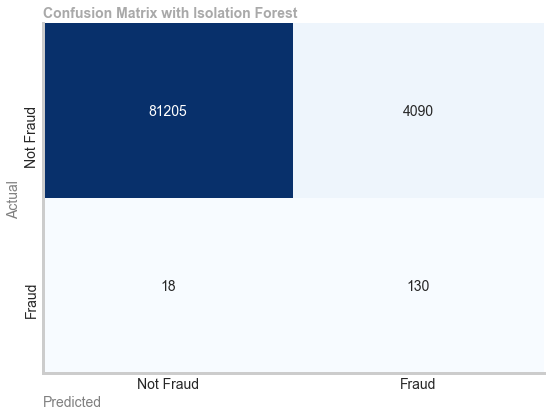

In [56]:
# we will run a Confusion Matrix with our  Isolation Forest Model
cm_if=confusion_matrix(y_test, if_prediction)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix with Isolation Forest',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Predicted',fontsize=14,color='grey',loc='left')
plt.ylabel('Actual',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()






Observation- we can see from our model that our isolation forest does not compare with out classification model and has not improved it. As there is a massive gap there is no sense in fine tuning this model.

# Other  Models Decision Tree Classifier

In [57]:
dfk=pd.read_csv('creditcard.csv')# Read in out Dataset

In [58]:
X=dfk.iloc[:, :-1].values
y=dfk.iloc[:, -1].values

In [59]:
#Split the data: we are using 20% test and 80% training 
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 5) # 80% training and 20% test

In [60]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284807, 30), (284807,), (227845, 30), (56962, 30), (227845,), (56962,))

In [61]:
#Building Decision Tree Model

In [62]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [63]:
#Evaluating Model

In [64]:
from sklearn import metrics

In [65]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.999403110845827
Accuracy: 1.00



It is unlikely tha a model provide 100% accuracy. This result shows that might be overfiting in the data. To verify this we decided to perform a Random forest, wich is a way to put in place ensemble learning to seek a better predection.

In [66]:
#Building a Random forest Model

In [67]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a  Randomforest Classifier
clf_RF = RandomForestClassifier(n_estimators = 30)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [68]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9995962220427653
Accuracy: 1.00


In [70]:
# we have split our data using an 80/20 split
X_train21,X_test21,y_train21,y_test21= train_test_split(X,y, test_size=0.20, stratify= y , random_state=2011)

scaler= MinMaxScaler()

smote=SMOTE(random_state=42)

X_train21_balanced,y_train21_balanced= smote.fit_resample(scaler.fit_transform(X_train21), y_train21)

X_test_scaled= scaler.transform(X_test21)

Rf_clf= RandomForestClassifier(n_estimators = 30)
Rf_clf.fit(X_train21_balanced,y_train21_balanced)

y_pred= Rf_clf.predict(X_test_scaled)

accuracy=accuracy_score(y_test21,y_pred)
print(f'Accuracy : {accuracy:.2f}')


Accuracy : 1.00


In [71]:
X_train21.shape, X_test21.shape

((227845, 30), (56962, 30))

Bagging is a nother esembling learning method. The idea of using these techniques is reducing the variance and thus having a better accuracy. we decided to perform this technique to see if the accuracy remains the same or changes. We have used 30 Hyperparameters in the previous model, and we will continue with the same number for this one.

In [72]:
import sklearn.ensemble as ensemble 

In [74]:
baggedModel=ensemble.BaggingClassifier(base_estimator=None,n_estimators=30,oob_score=True)

In [75]:
baggedMode
l.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, n_estimators=30, oob_score=True)

In [76]:
pr=baggedModel.predict(X_test)

In [77]:
cmb=confusion_matrix(y_test,pr)
cmb

array([[56855,     3],
       [   19,    85]], dtype=int64)

In [78]:
accuracy=accuracy_score(y_test, pr)
accuracy

0.9996137776061234

# Conclusion

WE have carried out a analysis of credit card fraud, we have built a model that has predicted frauds within our data. We have achieved good results however with futher anlalysis these results could be improved. The classification using cross validation achieved the best results however by using other anomaly detection models we feel this would be abetter option. 

#  Bibliography

 Xiao,2022.A Practical Guide To Exploratory Data Analysis..Available at: https://medium.com/mlearning-ai/a-practical-guide-to-exploratory-data-analysis-fabbac2bcad [Accesed] 03-11-2023]


Amy@grabgoinfo,2023.Isolation Forest For Anomaly Detection..Available at: https://medium.com/grabngoinfo/isolation-forest-for-anomaly-detection-cd7871ae99b4 [Accesed] 22-11-2023]

unknown,unknown.Feature Selection..Available at: https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination [Accesed] 03-11-2023]

#Geron, A. (2019) Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. 2nd ed. Sebastopol, CA: O’Reilly Media.

meghan Natarajan,2023.Intuition behind AUC and Precision-Recall Curves..Available at: https://medium.com/@megha.natarajan/intuition-behind-auc-and-precision-recall-curves-7a33d2d45e02 [Accesed] 21-11-2023]

Sena Ozgunay,2023.Isolation Forest for Anomaly Detection..Available at: https://medium.com/@senaozgunay/isolation-forest-for-anomaly-detection-4d7437b66c13 [Accesed] 22-11-2023]